In [29]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Garch(2,2) Model

### First I will define first 2 elements of normal time series and volatility time series, and then create a simulated time series based on garch formula.

### Reason to create garch data like this to check if we can get the same parameters back after fitting the garch model back to the simulated time series.

### $ a_{t} = \epsilon_{t} * \sqrt {\omega + \alpha_{1}*a_{t-1}^{2} + \alpha_{2}*a_{t-2}^{2} + \beta_{1}*\sigma_{t-1}^{2} + \beta_{2}*\sigma_{t-2}^{2}}$

### What ever is under square root above is the volatility component

### $ a_{0},  a_{1} \sim \mathcal{N}(0,1) $

### $ \sigma_{0}, \sigma_{1} = 1, 1$

### $ \epsilon_{t} \sim \mathcal{N}(0,1)$

In [30]:
"""dataset creation based on above conditions"""

n = 1000

"""These are just random numbers"""
omega = 0.7

alpha_1 = 0.1 # remember if you keep these variable high value, your simulated time series will explode
alpha_2 = 0.2

beta_1 = 0.23
beta_2 = 0.35

In [31]:
"""Both time series and it's volatility time series"""

time_series = [gauss(0,1), gauss(0,1)]
vol_time_series = [1, 1]

In [32]:
""" Simulating time series based on garch formula"""

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*time_series[-1]**2 + alpha_2*time_series[-2]**2 + beta_1*vol_time_series[-1]**2 + beta_2*vol_time_series[-2]**2)
    new_time_series = gauss(0,1) * new_vol
    
    vol_time_series.append(new_vol)
    time_series.append(new_time_series)

Text(0.5, 1.0, 'Simulated Garch(2,2) data')

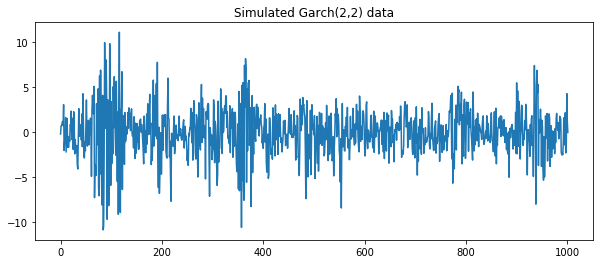

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(time_series)
plt.title("Simulated Garch(2,2) data")

## We can observe that volatility is high in some regions while low in other regions

Text(0.5, 1.0, 'Volatility of above time series')

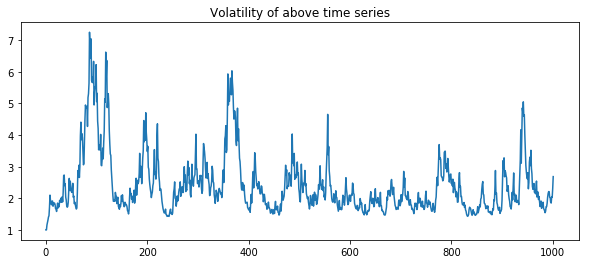

In [34]:
plt.figure(figsize=(10,4))
plt.plot(vol_time_series)
plt.title("Volatility of above time series")

## It can be observe that volatility plot correctly describe what we observed above.

Text(0.5, 1.0, "Comparison of time series data and it's volatility time series")

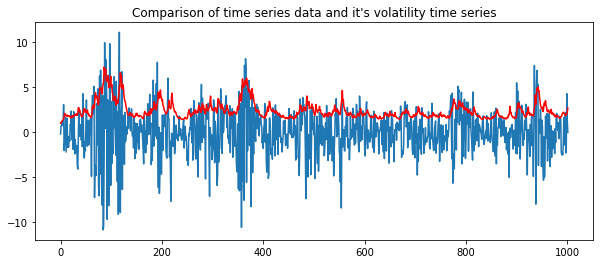

In [36]:
plt.figure(figsize=(10,4))
plt.plot(time_series)
plt.plot(vol_time_series, color="red")
plt.title("Comparison of time series data and it's volatility time series")

## Now we will identify what the AR and MA terms in the volatility time series by plotting PACF for AR and ACF for MA terms. 

## Look into plot of square ff your time series for PACF and ACF plot, look into above main equation for GARCH model

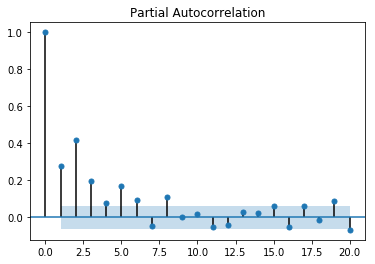

In [49]:
square_time_series = np.array(time_series)**2
plot_pacf(square_time_series, lags=20)
plt.show()

## PACF plot will directly show us what Garch model to use, if it shows 2 , then will use 2 terms of time series and also volatility series. Although above graph also 3, 4 as significant but we can assume that it is Shutting off significantly after there.

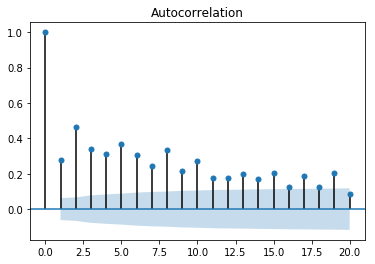

In [51]:
plot_acf(square_time_series, lags=20)
plt.show()

## ACF plot shows lots of significant correlation terms but remember it only proves the numbers of error terms to be included i.e. error term in square series which is no where used in our model, so it does not convey anything and should not be used for anything